In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/kaggle/input/big-basket-products/BigBasket.csv')
df1.head()

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url
0,Onion (Loose),Fresho,69.75,52.0,https://www.bigbasket.com/media/uploads/p/l/40...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/40075537/fresho-o...
1,Onion,Fresho,174.35,130.0,https://www.bigbasket.com/media/uploads/p/l/12...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201414/fresho-on...
2,Onion (Loose),Fresho,34.87,26.0,https://www.bigbasket.com/media/uploads/p/l/10...,1 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000148/fresho-o...
3,Onion,Fresho,69.74,52.0,https://www.bigbasket.com/media/uploads/p/l/12...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201413/fresho-on...
4,Onion (Loose),Fresho,174.37,129.0,https://www.bigbasket.com/media/uploads/p/l/10...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000150/fresho-o...


In [4]:
df1.shape

(8208, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8208 entries, 0 to 8207
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductName    8208 non-null   object 
 1   Brand          8208 non-null   object 
 2   Price          8208 non-null   float64
 3   DiscountPrice  8208 non-null   float64
 4   Image_Url      8208 non-null   object 
 5   Quantity       8208 non-null   object 
 6   Category       8208 non-null   object 
 7   SubCategory    8208 non-null   object 
 8   Absolute_Url   8208 non-null   object 
dtypes: float64(2), object(7)
memory usage: 577.3+ KB


In [6]:
# The Image_Url and Absolute_Url is not needed for analysis. So let's remove
df1.drop(columns=['Image_Url', 'Absolute_Url'], inplace = True)

In [50]:
df1['Category'].nunique()

11

In [7]:
df1['Category'].value_counts()

Category
Beauty & Hygiene            3789
Kitchen, Garden & Pets      1321
Foodgrains, Oil & Masala     718
Cleaning & Household         562
Gourmet & World Food         490
Snacks & Branded Foods       408
Eggs, Meat & Fish            360
Bakery, Cakes & Dairy        169
Beverages                    147
Baby Care                    127
Fruits & Vegetables          117
Name: count, dtype: int64

In [32]:
brand_counts = df1['Brand'].value_counts()
print(brand_counts.head(10))

Brand
Fresho        479
BB Royal      410
BB Home       183
Healthvit      98
DP             88
Soulflower     88
GoodDiet       87
Lakme          84
Nivea          83
BIOTIQUE       79
Name: count, dtype: int64


In [9]:
df1['ProductName'].nunique()

6769

In [10]:
df1['Discount_Percent'] = ((df1['Price'] - df1['DiscountPrice']) / df1['Price']) * 100

In [11]:
df1['Discount_Percent'].value_counts()

Discount_Percent
25.000000    1119
30.000000     658
40.000000     413
35.000000     339
0.000000      319
             ... 
28.679245       1
28.103448       1
26.127527       1
30.188235       1
48.979592       1
Name: count, Length: 2588, dtype: int64

In [12]:
df1['SubCategory'].nunique()

334

In [13]:
df1['Quantity'].nunique()

781

In [14]:
df1.describe(include="all")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ProductName,Brand,Price,DiscountPrice,Quantity,Category,SubCategory,Discount_Percent
count,8208,8208,8208.000000,8208.000000,8208,8208,8208,8208.000000
unique,6769,842,NaN,NaN,781,11,334,NaN
top,Tea,Fresho,NaN,NaN,1 pc,Beauty & Hygiene,Face Care,NaN
freq,10,479,NaN,NaN,858,3789,825,NaN
mean,NaN,NaN,545.418589,356.907968,NaN,NaN,NaN,31.961157
std,NaN,NaN,664.546512,438.097837,NaN,NaN,NaN,13.047817
min,NaN,NaN,5.000000,3.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,190.000000,129.000000,NaN,NaN,NaN,25.000000
50%,NaN,NaN,360.000000,238.000000,NaN,NaN,NaN,30.000000
75%,NaN,NaN,650.000000,429.000000,NaN,NaN,NaN,40.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


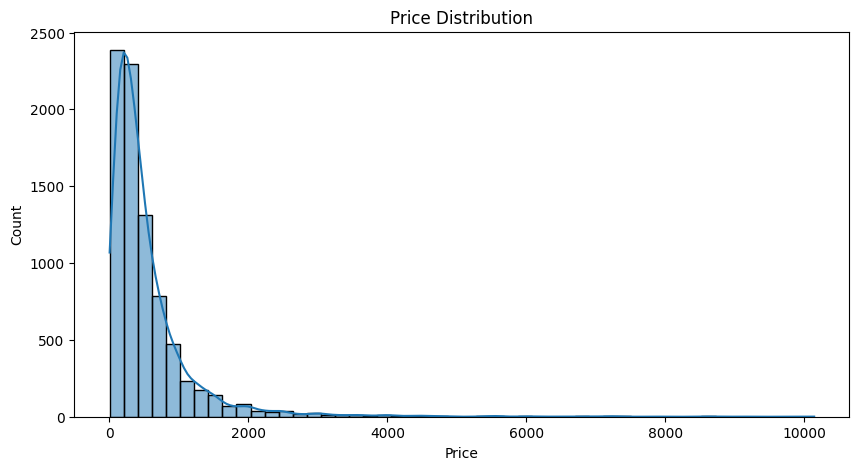

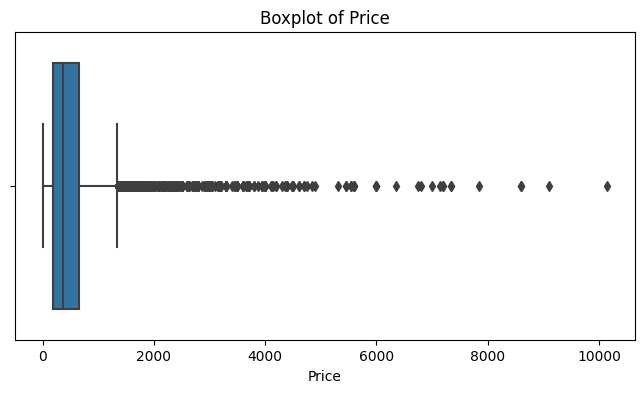

In [15]:
# Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(df1['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df1['Price'])
plt.title("Boxplot of Price")
plt.show()

In [17]:
# Define bin edges from min to max in 10 equal bins
bins = pd.interval_range(start=5, end=10140, periods=10)

# Cut the Price column into bins
df1['Price_Bin'] = pd.cut(df1['Price'], bins=bins)

# Count items in each bin
price_distribution = df1['Price_Bin'].value_counts().sort_index()
print(price_distribution)

Price_Bin
(5.0, 1018.5]        7255
(1018.5, 2032.0]      709
(2032.0, 3045.5]      141
(3045.5, 4059.0]       53
(4059.0, 5072.5]       21
(5072.5, 6086.0]       11
(6086.0, 7099.5]        4
(7099.5, 8113.0]        6
(8113.0, 9126.5]        3
(9126.5, 10140.0]       1
Name: count, dtype: int64


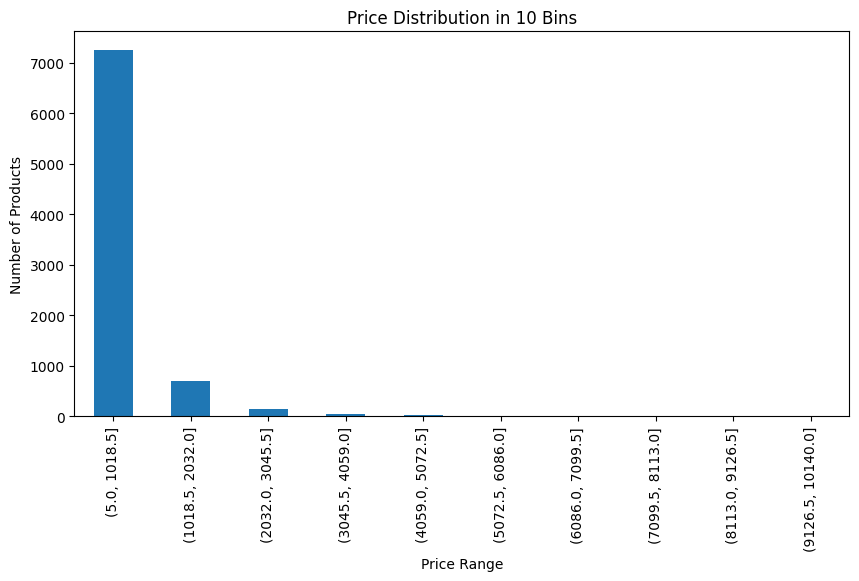

In [18]:
price_distribution.plot(kind='bar', figsize=(10,5))
plt.title("Price Distribution in 10 Bins")
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.show()

In [48]:
avg_discount_by_bin = df1.groupby("Price_Bin")["Discount_Percent"].mean()
print(avg_discount_by_bin)

Price_Bin
(5.0, 1018.5]        31.357961
(1018.5, 2032.0]     36.591512
(2032.0, 3045.5]     38.758139
(3045.5, 4059.0]     33.527244
(4059.0, 5072.5]     35.221917
(5072.5, 6086.0]     29.814846
(6086.0, 7099.5]     52.008279
(7099.5, 8113.0]     36.559315
(8113.0, 9126.5]     43.311214
(9126.5, 10140.0]    25.000000
Name: Discount_Percent, dtype: float64


/tmp/ipykernel_36/2909831313.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_discount_by_bin = df1.groupby("Price_Bin")["Discount_Percent"].mean()


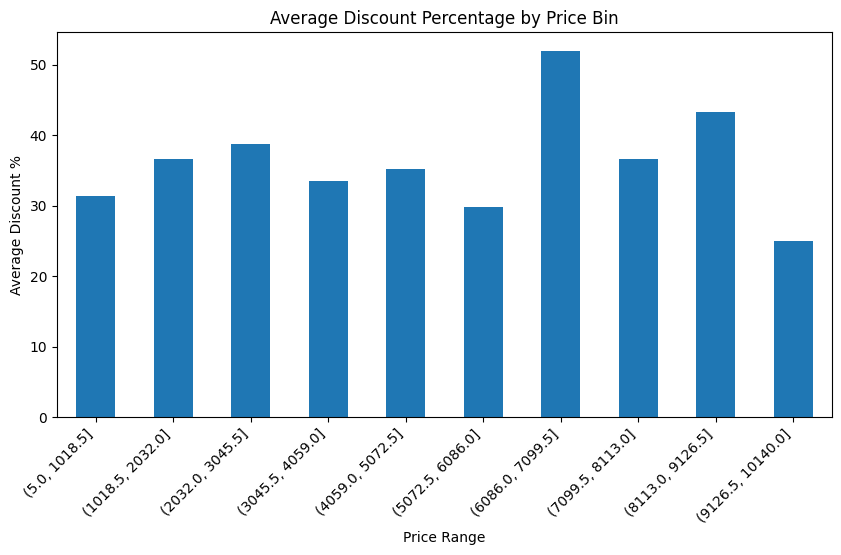

In [49]:
avg_discount_by_bin.plot(kind='bar', figsize=(10,5))
plt.title("Average Discount Percentage by Price Bin")
plt.xlabel("Price Range")
plt.ylabel("Average Discount %")
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# Let's filter the product categories have price between 3000 and 10000
filtered = df1[(df1['Price'] >= 3000) & (df1['Price'] <= 10000)]

categories = filtered['Category'].unique()
print(categories)

['Gourmet & World Food' 'Kitchen, Garden & Pets' 'Baby Care'
 'Eggs, Meat & Fish' 'Beauty & Hygiene' 'Foodgrains, Oil & Masala'
 'Cleaning & Household']


Category
Beauty & Hygiene            44
Kitchen, Garden & Pets      39
Gourmet & World Food         9
Baby Care                    4
Eggs, Meat & Fish            3
Cleaning & Household         3
Foodgrains, Oil & Masala     2
Name: count, dtype: int64


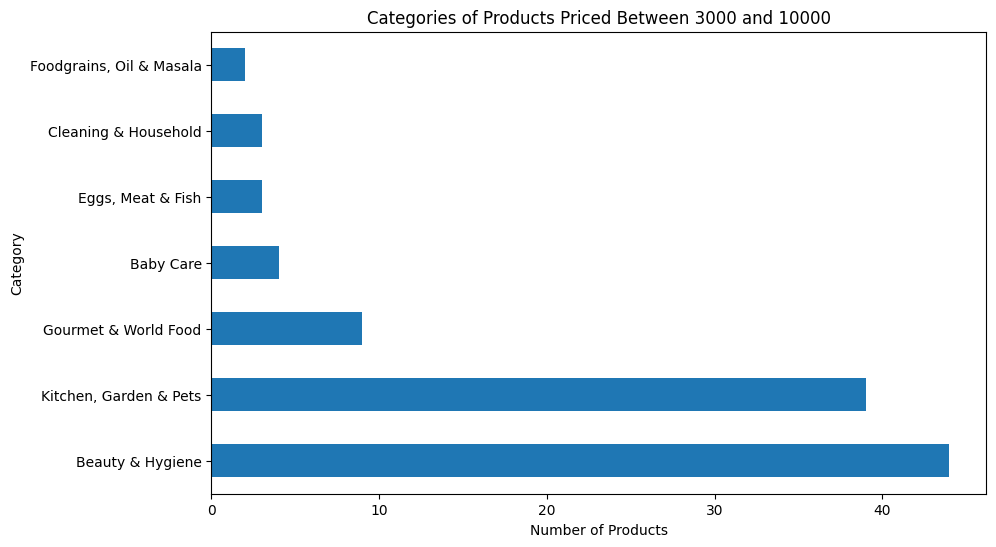

In [23]:
category_counts = filtered['Category'].value_counts()
print(category_counts)

category_counts.plot(kind='barh', figsize=(10,6))
plt.title("Categories of Products Priced Between 3000 and 10000")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.show()

In [29]:
# Highest discount product(s)
highest_discount_products = df1[df1['Discount_Percent'] == df1['Discount_Percent'].max()][['ProductName','Brand','Category','Discount_Percent']]

# Lowest discount product(s)
lowest_discount_products = df1[df1['Discount_Percent'] == df1['Discount_Percent'].min()][['ProductName','Brand','Category','Discount_Percent']]

print("Products with Highest Discount:")
print(highest_discount_products)

print("\nProducts with Lowest Discount:")
print(lowest_discount_products)


Products with Highest Discount:
                             ProductName         Brand          Category  \
4271  CMZ Plus Tablets - For Bone Health      Mojocare  Beauty & Hygiene   
4770         Flora Duo Eyeshadow Palette  ZUII ORGANIC  Beauty & Hygiene   

      Discount_Percent  
4271              80.0  
4770              80.0  

Products with Lowest Discount:
                                            ProductName                Brand  \
9                                        Eggs - Regular               Fresho   
12                                       Eggs - Regular               Fresho   
16         Disinfectant Toilet Cleaner Liquid, Original               Harpic   
21         Disinfectant Toilet Cleaner Liquid, Original               Harpic   
22         Disinfectant Toilet Cleaner Liquid, Original               Harpic   
...                                                 ...                  ...   
8119  Mahajwarankush Ras Tablets - For Body Ache Relief       Basic Ayur

In [43]:
category_counts = df1['Category'].value_counts()
print(category_counts)

subcategory_counts = df1['SubCategory'].value_counts()
print(subcategory_counts.head(10))   # top 10 subcategories

category_subcategory = df1.groupby(['Category','SubCategory']).size().reset_index(name='Count')
print(category_subcategory.head(5))

Category
Beauty & Hygiene            3789
Kitchen, Garden & Pets      1321
Foodgrains, Oil & Masala     718
Cleaning & Household         562
Gourmet & World Food         490
Snacks & Branded Foods       408
Eggs, Meat & Fish            360
Bakery, Cakes & Dairy        169
Beverages                    147
Baby Care                    127
Fruits & Vegetables          117
Name: count, dtype: int64
SubCategory
Face Care                 825
Supplements & Proteins    240
Face                      207
Body Care                 205
Shampoo & Conditioner     201
Ayurveda                  169
Men's Deodorants          165
Lips                      164
Eyes                      139
Nails                     122
Name: count, dtype: int64
    Category            SubCategory  Count
0  Baby Care              Baby Bath      6
1  Baby Care  Baby Creams & Lotions     13
2  Baby Care         Baby Gift Sets      3
3  Baby Care            Baby Health      2
4  Baby Care           Baby Laundry      6


In [44]:
subcategory_counts = df1.groupby("Category")["SubCategory"].nunique()
subcategory_counts = subcategory_counts.sort_values(ascending=False)
print(subcategory_counts)

Category
Beauty & Hygiene            55
Cleaning & Household        44
Kitchen, Garden & Pets      43
Gourmet & World Food        41
Snacks & Branded Foods      41
Foodgrains, Oil & Masala    37
Bakery, Cakes & Dairy       21
Fruits & Vegetables         16
Beverages                   13
Baby Care                   12
Eggs, Meat & Fish           11
Name: SubCategory, dtype: int64


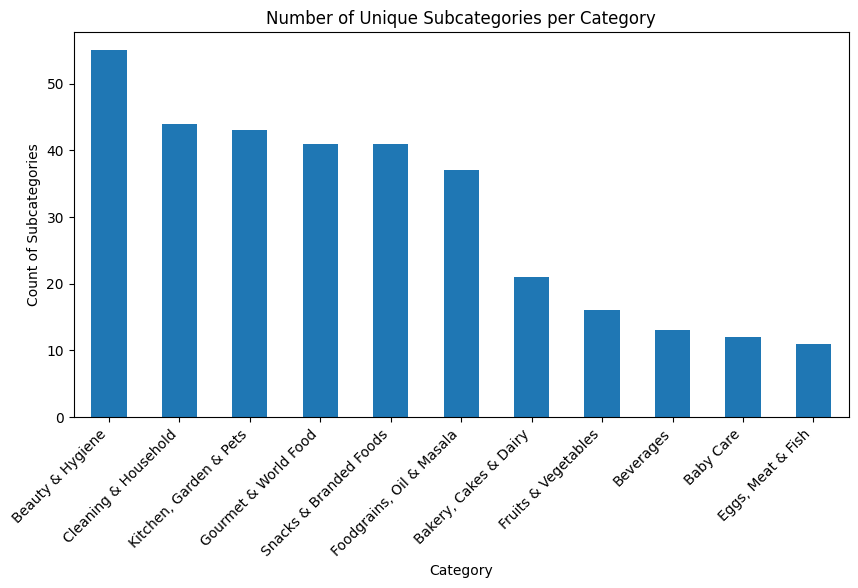

In [41]:
subcategory_counts = subcategory_counts.sort_values(ascending=False)
subcategory_counts.plot(kind='bar', figsize=(10,5))
plt.title("Number of Unique Subcategories per Category")
plt.xlabel("Category")
plt.ylabel("Count of Subcategories")
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
# Categorywise average discount
avg_discount_by_category = df1.groupby("Category")["Discount_Percent"].mean().sort_values(ascending=False)
print(avg_discount_by_category)

Category
Kitchen, Garden & Pets      38.069138
Fruits & Vegetables         37.284982
Cleaning & Household        36.425687
Gourmet & World Food        31.930548
Eggs, Meat & Fish           31.563334
Beauty & Hygiene            30.883317
Foodgrains, Oil & Masala    29.776331
Snacks & Branded Foods      26.225649
Baby Care                   26.149785
Bakery, Cakes & Dairy       25.772873
Beverages                   23.350337
Name: Discount_Percent, dtype: float64


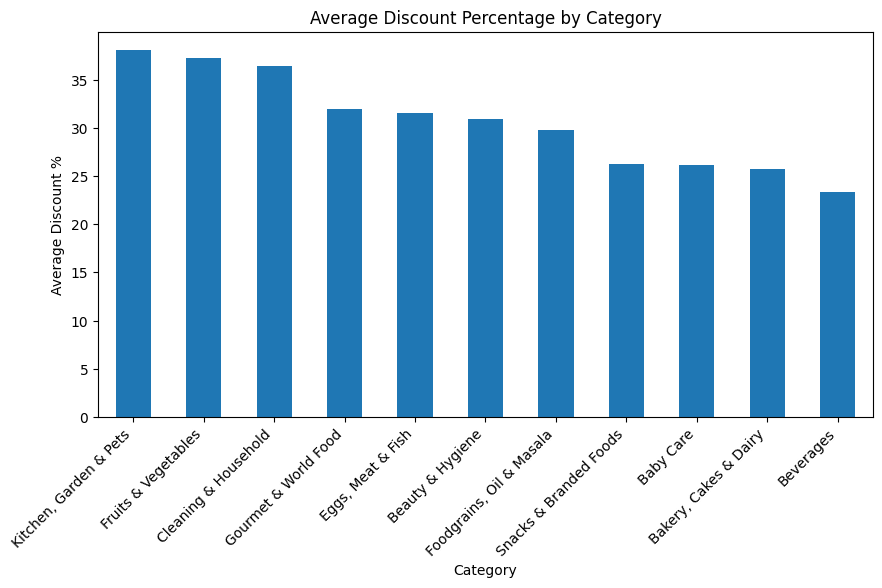

In [45]:
avg_discount_by_category.plot(kind='bar', figsize=(10,5))
plt.title("Average Discount Percentage by Category")
plt.xlabel("Category")
plt.ylabel("Average Discount %")
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights:**
1. The store has 6769 unique products in all with minimum price of Rs.5 to maximum price of Rs.10140
2. All products are divided into 11 categories and 334 subcategories.
3. The store has minimum discount of 0 and maximum discount of 80.
4. As per price bins, the store has 7255 products in the price range of Rs.5 to Rs.1018.5, and this price range has average discount of 31.35% which looks attractive for customers.
5. Daily use categories as
    i. Foodgrains, Oil & Masala    29.776331 
   ii. Eggs, Meat & Fish           31.563334
  iii. Bakery, Cakes & Dairy       25.772873
   iv. Beverages                   23.350337
    v. Fruits & Vegetables         37.284982
   have good average percent discount. So the customers will prefer shopping at this store.

